# Ellipse Area

Compute the ellipse area based on the chord lengths in slices orthogonal to direction of flow.

___

## Import packages

In [3]:
import dpm_tools as dpm
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt

[15:12:01] ERROR    PARDISO solver not installed, run `pip install pypardiso`. Otherwise,          ]8;id=651103;file://C:\Users\bcc2459\AppData\Roaming\Python\Python312\site-packages\openpnm\utils\_workspace.py\_workspace.py]8;;\:]8;id=742862;file://C:\Users\bcc2459\AppData\Roaming\Python\Python312\site-packages\openpnm\utils\_workspace.py#56\56]8;;\
                    simulations will be slow. Apple M chips not supported.                                         

## Demonstration image

To demonstrate the ellipse area, we generate a simple 3D binary image using the [PoreSpy blobs generator](https://porespy.org/examples/generators/tutorials/making_blobs.html) function. The example image size is $100 \times 100 \times 100$.

(-0.5, 99.5, 99.5, -0.5)

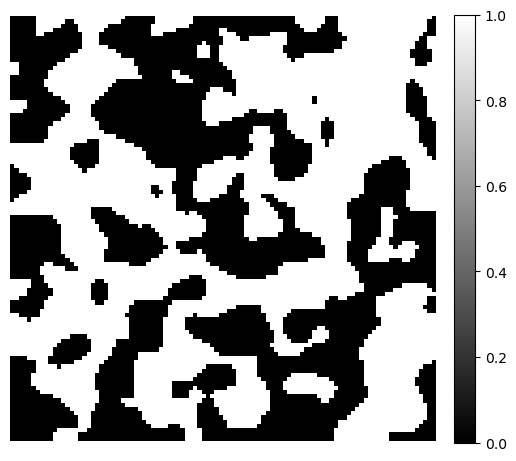

In [4]:
image = ps.generators.blobs(shape=[100, 100, 100])

fig, ax = plt.subplots(figsize=[6, 6])
im = ax.imshow(image[50], cmap="binary_r")
fig.colorbar(im, fraction=0.046, pad=0.04)
ax.axis(False)

## Ellipse Area Estimation

To approximate the area of a pore space cross-section, we analyze chord lengths measured through every point in the pore space. At each point, we compute chord lengths along multiple orientations and extract the maximum and minimum lengths. These are treated as approximations of the local major and minor axes of an ellipse.

Using these axes, the ellipse area is estimated by:

$$ A_{\text{ellipse}} = \pi a b $$

where $a$ and $b$ are the major and minor axes of the ellipse, respectively.

  0%|          | 0/25 [00:00<?, ?it/s]

(-0.5, 100.5, 99.5, -0.5)

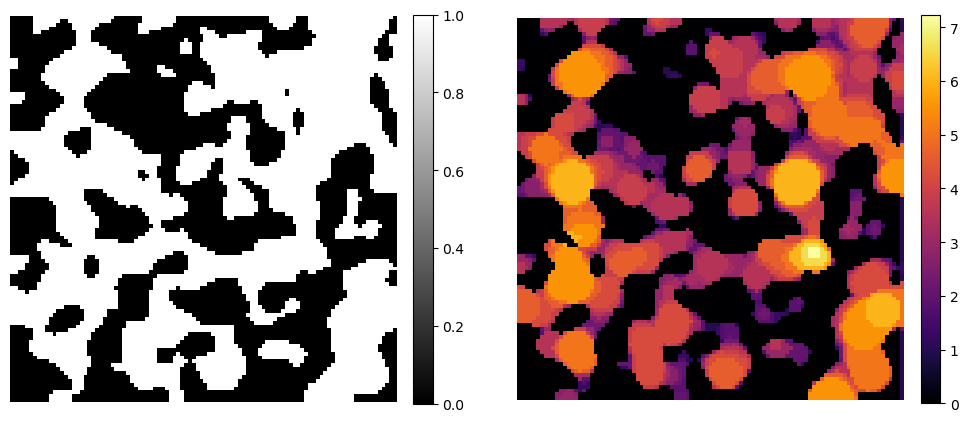

In [7]:
image_mis = dpm.metrics.mis(image)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
im = ax[0].imshow(image[50], cmap="binary_r")
fig.colorbar(im, fraction=0.046, pad=0.04)
ax[0].axis(False)
im = ax[1].imshow(image_mis[50], cmap="inferno")
fig.colorbar(im, fraction=0.046, pad=0.04)
ax[1].axis(False)

## Constriction Factor

One important consideration for transport in porous media is the *change* in the cross-sectional area available for flow. Here, we adapt the idea of the *constriction factor*, which quantifies the ratio between the largest and smallest areas, to the slice-wise constriction factor. The slice-wise constriction factor is computed as:

$$ C_{\text{slice}} = \frac{\text{thickness}[x, y, z]}{\text{thickness}[x, y, z + 1]} $$

Values larger than 1 indicates that the cross-sectional area decreases in subsequent slices, while values less than 1 indicate an increase. Any thickness map can be used (e.g. maximum inscribed spheres, Euclidean distance transform, etc.). Here, we exemplify using the ellipse areas.

(-0.5, 100.5, 99.5, -0.5)

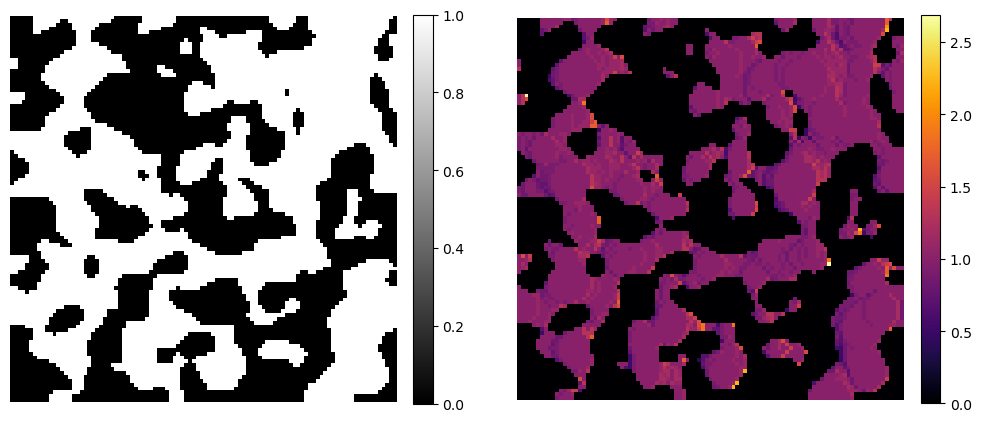

In [13]:
image_cf = dpm.metrics.constriction_factor(image_mis)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
im = ax[0].imshow(image[50], cmap="binary_r")
fig.colorbar(im, fraction=0.046, pad=0.04)
ax[0].axis(False)
im = ax[1].imshow(image_cf[50], cmap="inferno")
fig.colorbar(im, fraction=0.046, pad=0.04)
ax[1].axis(False)